<a href="https://colab.research.google.com/github/Jayannthan/SSN-SEMESTER-5/blob/main/AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment 1:

In [ ]:
pip install binarytree


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.2 MB 36.6 MB/s 
     |████████████████████████████████| 42 kB 1.4 MB/s 
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.


In [ ]:
pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from binarytree import build
def generate(st,num):
    balls = []
    if(st=="red"):
        for i in range(num):
            balls.append(2*i+1)
    else:
        for i in range(1,num+1):
            balls.append(2*i)
    return balls


def dfs(balls,curr,siz,gs,state):
    if(curr<siz):
        print(balls[curr],end=" ")
        if(balls[curr]==gs):
            return 1
        if(state!=1):
            state=dfs(balls,2*curr+1,siz,gs,state)
            if(state==1):return 1
            state=dfs(balls,2*curr+2,siz,gs,state)
            if(state==1):return 1
        return state
        


def printchild(balls,curr,siz,gs):
    if(2*curr+1<siz):
        print(balls[2*curr+1],end=" ")
        if(balls[2*curr+1]==gs):return 1
    if(2*curr+2<siz):
        print(balls[2*curr+2],end=" ")
        if(balls[2*curr+2]==gs):return 1
    return 0

def bfs(balls,curr,siz,gs,state):
    if(curr<siz):
        state=printchild(balls,curr,siz,gs)
        if(state!=1):
            state=bfs(balls,2*curr+1,siz,gs,state)
        if(state!=1):
            state=bfs(balls,2*curr+2,siz,gs,state)
        return state
        
        


st=str(input("Enter String:"))
num=int(input("Enter number to generate number of balls:"))
print("You have chosen: "+ st)
print("No of balls to generate: " + str(num))

balls=generate(st,num)
print(balls)

root = build(balls)
print(root)


gs=int(input("Enter goal state of ball to traverse:"))
print("DFS TRACE:")
dfs(balls,0,num,gs,0)

print()
print("BFS TRACE:\n" + str(balls[0]),end=" ")
f=bfs(balls,0,num,gs,0)

ModuleNotFoundError: ignored

In [ ]:
from anytree import build
import random
def generate(num,initial,final):
    randnos = []
    import random
    randnos=random.sample(range(initial,final+1), num)
    return randnos

def dls(cur_limit,limit,index,arr,N):
    if index >= len(arr):
        return False;
    if (limit+1) == cur_limit:
        cur_limit-=1
        return False;
    print(arr[index],end = " ")
    if arr[index]==N:
        return True
    cur_limit+=1
    if dls(cur_limit,limit,2*index+1,arr,N) == True:
        return True
    if dls(cur_limit,limit,2*index+2,arr,N) == True:
        return True
    return False   

    
from anytree import Node, RenderTree
def ids(limit,arr,N):
    for i in range(limit+1):
        print("level "+ (str)(i) +":",end = " ")
        nodes=dls(0,i,0,randnos,N)
        print()
        if(nodes==True): 
            print("\Found " + (str)(limit))
            return
    print("\nNot Found until Level " + (str)(limit))



num=int(input("Enter number to generate number of numbers:"))
intial=int(input("Enter initial number to generate:"))
final=int(input("Enter number to generate number of numbers:"))

randnos=generate(num,intial,final)
print(randnos)

root = build(randnos)
print(root)

N = int(input("Enter goal state : "))
limit = int(input("Enter limit : "))
nodes=dls(0,limit,0,randnos,N)
# if nodes==False : print("\nNot Found until Level " + (str)(limit))

print()
ids(limit,randnos,N)

Enter number to generate number of numbers:20
Enter initial number to generate:1
Enter number to generate number of numbers:100
[25, 71, 9, 97, 38, 35, 92, 29, 11, 99, 6, 24, 17, 59, 61, 74, 31, 42, 91, 19]

                       ____________25_________
                      /                       \
           __________71______              ____9___
          /                  \            /        \
     ____97___               _38        _35        _92
    /         \             /   \      /   \      /   \
  _29         _11         _99    6    24    17   59    61
 /   \       /   \       /
74    31    42    91    19

Enter goal state : 74
Enter limit : 4
25 71 97 29 74 
level 0: 25 
level 1: 25 71 9 
level 2: 25 71 97 38 9 35 92 
level 3: 25 71 97 29 11 38 99 6 9 35 24 17 92 59 61 
level 4: 25 71 97 29 74 
\Found 4


In [ ]:
pathcostbfs=0
pathcostdfs=0 
pathcostdls=0

def next_state(a, b):
  nodes = []
  if (a != 0):
    nodes.append((0, b))
    if (a <= 3 - b):
      nodes.append((0, b + a))
    else:
      nodes.append((a - (3 - b), 3))
  if (b != 0):
    nodes.append((a, 0))
    if (b <= 4 - a):
      nodes.append((a + b, 0))
    else:
      nodes.append((4, 3 - (4 - a)))
  if (a != 4):
    nodes.append((4, b))
  if (b != 3):
    nodes.append((a, 3))
  return nodes


def bfs():
  visited = set()
  que.append(((0, 0), 0))
  while len(que) > 0:
    current_state, level = que.pop(0)
    if current_state not in visited:
      visited.add(current_state)
      pathcostbfs=pathcostbfs+1;
      print(current_state,end=" ")
      if current_state in goal_states:
        print("Goal state reached")
        break
    nxt = next_state(*current_state)
    for x in nxt:
        que.append((x, level + 1))

def dfs():
  visited = set()
  sta.append(((0, 0), 0))
  while len(sta) > 0:
    current_state, level = sta.pop(len(sta)-1)
    if current_state not in visited:
      visited.add(current_state)
      pathcostdfs=pathcostdfs+1
      print(current_state,end=" ")
      nxt = next_state(*current_state)
      for x in nxt:
        sta.append((x, level + 1))
      if current_state in goal_states:
        print("Goal state reached")
        break

def dls(limit):
  visited = set()
  sta=[]
  sta.append(((0, 0), 0))
  while len(sta) > 0:
    current_state, level = sta.pop(len(sta)-1)
    if current_state not in visited:
      visited.add(current_state)
      pathcostdls=pathcostdls+1
      print(current_state,end=" ")
      if current_state in goal_states:
        print("Goal state reached")
        return 1
      if level != limit:
        nxt = next_state(*current_state)
        for x in nxt:
            sta.append((x, level + 1))


def ids():
    limit=0
    while(limit+1):
        flag=dls(limit)
        if(flag==1):
            break
        limit=limit+1
        print()

# print(1)
initial_state = (0, 0)
goal_states = [(2, 0), (2, 1), (2, 2), (2, 3)]
que = []
sta = []
# temp=[]
# temp1=[]
limit = 6
print("BFS")
bfs()
print("bfspathcost =",pathcostbfs )
print("DFS")
dfs()
print("dfspathcost =",pathcostdfs )
print("DLS")
limit = int(input("Enter limit : "))
a=dls(limit)
print("dlspathcost =",pathcostdls )
print("IDS")
ids()

SyntaxError: ignored

In [ ]:
def next_state(a, b):
  nodes = []
  if (a != 0):
    nodes.append((0, b))
    if (a <= 3 - b):
      nodes.append((0, b + a))
    else:
      nodes.append((a - (3 - b), 3))
  if (b != 0):
    nodes.append((a, 0))
    if (b <= 4 - a):
      nodes.append((a + b, 0))
    else:
      nodes.append((4, 3 - (4 - a)))
  if (a != 4):
    nodes.append((4, b))
  if (b != 3):
    nodes.append((a, 3))
  return nodes

def bfs():
  global bfspath
  visited = set()
  que.append(((0, 0), 0))
  while len(que) > 0:
    current_state, level = que.pop(0)
    if current_state not in visited:
      bfspath=bfspath+1
      visited.add(current_state)
      print(current_state,end=" ")
      if current_state in goal_states:
        print("Goal state reached")
        break
    nxt = next_state(*current_state)
    for x in nxt:
        que.append((x, level + 1))

          
def dfs():
  global dfspath
  visited = set()
  sta.append(((0, 0), 0))
  while len(sta) > 0:
    current_state, level = sta.pop(len(sta)-1)
    if current_state not in visited:
      dfspath=dfspath+1
      visited.add(current_state)
      print(current_state,end=" ")
      nxt = next_state(*current_state)
      for x in nxt:
        sta.append((x, level + 1))
      if current_state in goal_states:
        print("Goal state reached")
        break

def dls(limit):
  global dlspath
  visited = set()
  sta=[]
  sta.append(((0, 0), 0))
  while len(sta) > 0:
    current_state, level = sta.pop(len(sta)-1)
    if current_state not in visited:
      dlspath=dlspath+1
      visited.add(current_state)
      print(current_state,end=" ")
      if current_state in goal_states:
        print("Goal state reached")
        return 1
      if level != limit:
        nxt = next_state(*current_state)
        for x in nxt:
            sta.append((x, level + 1))


def ids():
    limit=0
    while(limit+1):
        flag=dls(limit)
        if(flag==1):
            break
        limit=limit+1
        print()

initial_state = (0, 0)
goal_states = [(2, 0), (2, 1), (2, 2), (2, 3)]
que = []
sta = []
bfspath=0
dfspath=0
dlspath=0
limit = 6
print("BFS")
bfs()
print()
print("BFS path cost: ",bfspath)
print()
print("DFS")
dfs()
print()
print("DFS path cost: ",dfspath)
print()
print("DLS")
a=dls(6)
print()
dlspathcost=dlspath
print()
dlspath=0
print("IDS")
ids()
print()
idspathcost=dlspath
arr=[("BFS",bfspath),("DFS",dfspath),("DLS",dlspathcost),("IDS",idspathcost)]
arr.sort(key=lambda x: x[1])
print(arr[0][0],"is the best solution as it has the shortest path cost of",arr[0][1])

BFS
(0, 0) (4, 0) (0, 3) (1, 3) (4, 3) (3, 0) (1, 0) (3, 3) (0, 1) (4, 2) (4, 1) (0, 2) (2, 3) Goal state reached

BFS path cost:  13

DFS
(0, 0) (0, 3) (4, 3) (4, 0) (1, 3) (1, 0) (0, 1) (4, 1) (2, 3) Goal state reached

DFS path cost:  9

DLS
(0, 0) (0, 3) (4, 3) (4, 0) (1, 3) (1, 0) (0, 1) (3, 0) (3, 3) (4, 2) (0, 2) (2, 0) Goal state reached


IDS
(0, 0) 
(0, 0) (0, 3) (4, 0) 
(0, 0) (0, 3) (4, 3) (3, 0) (4, 0) (1, 3) 
(0, 0) (0, 3) (4, 3) (4, 0) (3, 0) (3, 3) 
(0, 0) (0, 3) (4, 3) (4, 0) (1, 3) (3, 0) (3, 3) (4, 2) 
(0, 0) (0, 3) (4, 3) (4, 0) (1, 3) (1, 0) (3, 0) (3, 3) (4, 2) (0, 2) 
(0, 0) (0, 3) (4, 3) (4, 0) (1, 3) (1, 0) (0, 1) (3, 0) (3, 3) (4, 2) (0, 2) (2, 0) Goal state reached

DFS is the best solution as it has the shortest path cost of 9


In [ ]:
import math

def printHeuristic(hr):
  ch = 'A'
  for i in range(len(graph)):
    print(chr(ord(ch) + i), end="\t")
  print()
  for i in range(len(hr)):
      print(hr[i],end="\t")

def printGraph(graph):
    print("\t", end="")
    ch = 'A'
    for i in range(len(graph)):
      print(chr(ord(ch) + i), end="\t")
    print()
    for i in range(len(graph)):
      for j in range(len(graph[0])):
        if(j==0 and i==0):
          print("A",end="\t")
        if(j==0 and i==len(graph)-1):
          print("H",end="\t")
        if (j == 0 and i!=0 and i!=len(graph)-1):
            print(chr(ord(ch) + i-1), end="\t")
        print(graph[i][j], end="\t")
      print()

def minDistance(dist,visited,n):
  min=math.inf
  for v in range(n):
    if dist[v] < min and visited[v] == False:
      min = dist[v]
      min_index = v
 
  return min_index

def dijkstra(graph,n,hr):
  dist=[]
  dist1=[]
  visited=[]
  path=[]
  for i in range(n):
    dist.append(math.inf)
    dist1.append(math.inf)
    visited.append(False)
    path.append([])
  start=0
  dist[start]=0
  dist1[start]=0
  path[0].append(0)
  for j in range(n):
    u = minDistance(dist, visited,n)
    visited[u] = True
    for v in range(n):
      if (graph[u][v] > 0 and visited[v] == False and dist[v] > dist[u] +hr[v]):
        dist1[v]=dist1[u] + graph[u][v]
        dist[v] = dist[u] +hr[v]
        print("path before pop:",path)

        for i in range(len(path[v])):
            path[v].pop()
        print("path after pop:",path)
        for i in range(len(path[u])):
            path[v].append(path[u][i])
        path[v].append(v)
        print("path after append:",path)

  return dist1[n-1],path[n-1]

def astar(graph,n,hr):
  dist=[]
  dist1=[]
  visited=[]
  path=[]
  for i in range(n):
    dist.append(math.inf)
    dist1.append(math.inf)
    visited.append(False)
    path.append([])
  start=0
  dist[start]=0
  dist1[start]=0
  path[0].append(0)
  for j in range(n):
    u = minDistance(dist, visited,n)
    visited[u] = True
    for v in range(n):
      if (graph[u][v] > 0 and visited[v] == False and dist[v] > dist[u] + graph[u][v]+hr[v]):
        dist1[v]=dist1[u] + graph[u][v]
        dist[v] = dist[u] + graph[u][v]+hr[v]
        for i in range(len(path[v])):
            path[v].pop()
        for i in range(len(path[u])):
            path[v].append(path[u][i])
        path[v].append(v)
  return dist1[n-1],path[n-1]
   
# Main Program

graph = [
    [0,9,6,0,0,0,0,0],
    [9,0,0,5,0,0,0,0],
    [6,0,0,8,0,5,0,0],
    [0,5,8,0,7,0,6,0],
    [0,0,0,7,0,0,0,4],
    [0,0,5,0,0,0,7,0],
    [0,0,0,6,0,7,0,8],
    [0,0,0,0,4,0,8,0],
]
hr=[4,3,3,2,1,2,1,0]

n=8
while (True):
  print()
  ch = int(input("Enter choice(1-Print graph, 2-A* search, 3-Greedy):"))
  if (ch == 1):
    print("Graph-")
    print()
    printGraph(graph)
    print()
    print("Heuristic Value-")
    print()
    printHeuristic(hr)
    print()
    print()
  elif(ch==2):
    print("A*")
    v,p=astar(graph,8,hr)
    print("Value = "+ str(v) )
    print("PATH:-")
    ch='A'
    for i in range(len(p)):
      print(chr(ord(ch) + p[i]),end="")
      print(" --> ",end="")
  elif (ch == 3):
    print("Greedy")
    v,p=dijkstra(graph,8,hr)
    print("Value = "+ str(v) )
    print("PATH:-")
    ch='A'
    for i in range(len(p)):
      print(chr(ord(ch) + p[i]),end="")
      print(" --> ",end="")
  else:
      break



Greedy
path before pop: [[0], [], [], [], [], [], [], []]
path after pop: [[0], [], [], [], [], [], [], []]
path after append: [[0], [0, 1], [], [], [], [], [], []]
path before pop: [[0], [0, 1], [], [], [], [], [], []]
path after pop: [[0], [0, 1], [], [], [], [], [], []]
path after append: [[0], [0, 1], [0, 2], [], [], [], [], []]
path before pop: [[0], [0, 1], [0, 2], [], [], [], [], []]
path after pop: [[0], [0, 1], [0, 2], [], [], [], [], []]
path after append: [[0], [0, 1], [0, 2], [0, 1, 3], [], [], [], []]
path before pop: [[0], [0, 1], [0, 2], [0, 1, 3], [], [], [], []]
path after pop: [[0], [0, 1], [0, 2], [0, 1, 3], [], [], [], []]
path after append: [[0], [0, 1], [0, 2], [0, 1, 3], [], [0, 2, 5], [], []]
path before pop: [[0], [0, 1], [0, 2], [0, 1, 3], [], [0, 2, 5], [], []]
path after pop: [[0], [0, 1], [0, 2], [0, 1, 3], [], [0, 2, 5], [], []]
path after append: [[0], [0, 1], [0, 2], [0, 1, 3], [0, 1, 3, 4], [0, 2, 5], [], []]
path before pop: [[0], [0, 1], [0, 2], [0, 

KeyboardInterrupt: ignored

In [ ]:
from queue import PriorityQueue
g={}
node={}
pos={}
dx = [1, -1, 0, 0]
dy = [0, 0, 1, -1]
f = {}
visited = set()
def create_graph():
  g['A'].append(('B', 9))
  g['B'].append(('A', 9))
  g['A'].append(('C', 6))
  g['C'].append(('A', 6))
  g['B'].append(('D', 5))
  g['D'].append(('B', 5))
  g['C'].append(('D', 8))
  g['D'].append(('C', 8))
  g['D'].append(('E', 7))
  g['E'].append(('D', 7))
  g['C'].append(('F', 5))
  g['F'].append(('C', 5))
  g['D'].append(('G', 6))
  g['G'].append(('D', 6))
  g['H'].append(('E', 4))
  g['E'].append(('H', 4))
  g['G'].append(('F', 7))
  g['F'].append(('G', 7))
  g['H'].append(('G', 8))
  g['G'].append(('H', 8))

def manhattan_dst(x1, y1, x2, y2):
  return abs(x1 - x2) + abs(y1 - y2)
  
def greedy_best_fs(x, y):
  global f, visited
  visited = set()
  t = node[(x, y)]
  f[t] = manhattan_dst(x, y, 3, 3)
  # print(f[t])
  # visited.add(t)
  q = PriorityQueue()
  q.put((f[t], t))
  while q.qsize() > 0:
    (c1, t1) = q.get()
    if t1 in visited:
      continue
    visited.add(t1)
    print((c1, t1))
    if t1 == 'H':
      break
    for (t, c1) in g[t1]:
      # print(t)
      (x1, y1) = pos[t]
      # print(x1, y1)
      f[t] = manhattan_dst(x1, y1, 3, 3)     
      q.put((f[t], t))


def a_star(x, y):
  global f, visited
  visited = set()
  f = {}
  t = node[(x, y)]
  f[t] = manhattan_dst(x, y, 3, 3)
  # print(f[t])
  # visited.add(t)
  q = PriorityQueue()
  q.put((f[t], 0, t))
  while q.qsize() > 0:
    (c1, g1, t1) = q.get()
    if t1 in visited:
      continue
    visited.add(t1)
    print((c1, g1, c1 - g1, t1))
    if t1 == 'H':
      break
    for (t, c2) in g[t1]:
      (x1, y1) = pos[t]
      
      f[t] = manhattan_dst(x1, y1, 3, 3) + c2 + g1    
      q.put((f[t], c2 + g1, t))

      
c = 'A'
for i in range(1, 4):
  for j in range(1, 4):
    if i == 1 and j == 3:
      continue
    node[(i, j)] = c
    pos[c] = (i, j)
    g[c] = []
    c = chr(ord(c) + 1)
  

print(pos)
create_graph()
print("greedy best first search")
greedy_best_fs(1,1)
print("a_star search")
a_star(1,1)
# print(g)

{'A': (1, 1), 'B': (1, 2), 'C': (2, 1), 'D': (2, 2), 'E': (2, 3), 'F': (3, 1), 'G': (3, 2), 'H': (3, 3)}
greedy best first search
(4, 'A')
(3, 'B')
(2, 'D')
(1, 'E')
(0, 'H')
a_star search
(4, 0, 4, 'A')
(9, 6, 3, 'C')
(12, 9, 3, 'B')
(13, 11, 2, 'F')
(16, 14, 2, 'D')
(19, 18, 1, 'G')
(22, 21, 1, 'E')
(25, 25, 0, 'H')


In [ ]:
# pip install numpy

import numpy as np
import random



def geneticalgo(nq,maxFitness):
    population = np.random.randint(nq, size=(8, 8))
    print("population:",population)


nq = int(input("Enter Number of Queens: ")) #say N = 8
maxFitness = (nq*(nq-1))/2  # 8*7/2 = 28
geneticalgo(nq,maxFitness)

Enter Number of Queens: 8
population: [[5 0 0 7 2 1 5 2]
 [4 5 4 7 3 4 1 6]
 [2 1 5 6 6 5 2 6]
 [4 7 5 3 6 1 5 3]
 [2 2 4 1 7 1 4 2]
 [0 6 6 0 6 6 3 5]
 [2 1 5 2 6 0 3 3]
 [6 6 7 5 4 0 0 5]]


In [ ]:
import random
def fitnessFunction(state):
  fitness = 0
  for i in range(0, 7 + 1):
    for j in range(i + 1, 7 + 1):
      if (state[i] != state[j] and j - i != abs(state[i] - state[j])):
        fitness += 1
  return fitness

def createChildren(parent1, parent2):
    state1 = parent1[2]
    state2 = parent2[2]
    parent1[1] -= 1
    parent2[1] -= 1
    #crossover
    child1 = [state1[0], state1[1], state1[2], state1[3],
             state2[4], state2[5], state2[6], state2[7]]
    child2 = [state2[0], state2[1], state2[2], state2[3],
             state1[4], state1[5], state1[6], state1[7]]
    #mutation
    pos = random.randint(0, 7)
    val = random.randint(0, 7)
    child1[pos] = val
    pos = random.randint(0, 7)
    val = random.randint(0, 7)
    child2[pos] = val
    return [fitnessFunction(child1), 0, child1], [fitnessFunction(child2), 0, child2]

def GA(states):
    loops=0
    while (states[0][0] < 28):
        loops += 1
        print("Loop : ", loops,"\tMaximum obtained fitness till now: ",states[0][0])

        for i in range(0, min(2, len(states) - 1), 2):
            parent1 = states[i]
            parent2 = states[i + 1]
            children1,children2 = createChildren(parent1, parent2)
        states.append(children1)
        states.append(children2)
        states.sort(reverse = True)
    print("\n\n!!!FOUND THE ANSWER!!!\nLoop : ", loops+1,"\tMaximum fitness: ",states[0][0])
    return states



K = 10
states = []
for i in range(K):
	state = [random.randint(0, 7) for j in range(8)]
	print(state)
	states.append([fitnessFunction(state), 0, state])
states.sort(reverse = True)
states=GA(states)
print("Solution : ", states[0][2])
# print(states)

[2, 3, 2, 0, 4, 0, 1, 2]
[5, 2, 3, 0, 1, 0, 2, 7]
[4, 7, 0, 4, 3, 3, 2, 6]
[4, 5, 5, 4, 1, 7, 3, 3]
[1, 4, 0, 5, 6, 0, 0, 0]
[4, 5, 4, 3, 6, 1, 7, 1]
[0, 1, 5, 3, 5, 1, 1, 1]
[6, 6, 7, 0, 7, 0, 7, 6]
[4, 0, 1, 5, 2, 6, 4, 6]
[3, 2, 3, 7, 0, 5, 4, 0]
Loop :  1 	Maximum obtained fitness till now:  22
Loop :  2 	Maximum obtained fitness till now:  23
Loop :  3 	Maximum obtained fitness till now:  24
Loop :  4 	Maximum obtained fitness till now:  24
Loop :  5 	Maximum obtained fitness till now:  24
Loop :  6 	Maximum obtained fitness till now:  24
Loop :  7 	Maximum obtained fitness till now:  24
Loop :  8 	Maximum obtained fitness till now:  24
Loop :  9 	Maximum obtained fitness till now:  24
Loop :  10 	Maximum obtained fitness till now:  24
Loop :  11 	Maximum obtained fitness till now:  24
Loop :  12 	Maximum obtained fitness till now:  24
Loop :  13 	Maximum obtained fitness till now:  24
Loop :  14 	Maximum obtained fitness till now:  24
Loop :  15 	Maximum obtained fitness till now

AI 6:Minmax Algorithm

In [ ]:
from binarytree import build

def generate(limit):
    values=[]
    for i in range(1,2**(limit+1)):
        values.append(i)
    print(values)
    return values


def successors(node):
  return 2 * node, 2 * node + 1

def evaluate(node):
  return node


def maxplayer(node,level,limit):
    ans = 0
    for nextNode in successors(node):
      ans = max(ans, minimax(nextNode, 'min', level + 1, limit))
    # values[node - 1] = str([node, ans])
    return ans

def minplayer(node,level,limit):
    ans = 10000 
    for nextNode in successors(node):
      ans = min(ans, minimax(nextNode, 'max', level + 1, limit))
    # values[node - 1] = str([node, ans])
    return ans

def minimax(node, player, level, limit):
  if level == limit:
    ans = evaluate(node)
    # values[node - 1] = str([node, ans])
    return ans
   
  if player == 'max':
    return maxplayer(node,level,limit)
  else:
    return minplayer(node,level,limit)
   


limit = int(input('Enter limit : '))
print("Building Tree")

values = generate(limit)
print(values)
root = build(values)
print(root)

print('Answer : ', minimax(1, 'max', 0, limit))



Enter limit : 9
Building Tree
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 21

In [ ]:
import ttg
def change(exp):
  exp=exp.replace("V","or")
  exp=exp.replace("^","and")
  return exp
def is_tautology(exp):
  table=ttg.Truths(['p','q'],[exp])
  print(table)
  if(table.valuation()=="Tautology"):
    return True
  else:
    return False
def are_equivalent(exp1,exp2):
  table=ttg.Truths(['p','q'],[exp1,exp2])
  print(table)
  df=table.as_pandas()
  return df[exp1].equals(df[exp2])
exp=input("Enter expression with inputs p and q: ")
exp=change(exp)
if(is_tautology(exp)):
  print("It is a tautology")
else:
  print("It is not a tautology")
exp1=input("Enter first expression with inputs p and q: ")
exp2=input("Enter first expression with inputs p and q: ")
exp1=change(exp1)
exp2=change(exp2)
if(are_equivalent(exp1,exp2)):
  print("The two expressions are equivalent")
else:
  print("The two expressions are not equivalent")

ModuleNotFoundError: ignored

In [ ]:
def And(a, b):
  n = len(a)
  return [a[i] and b[i] for i in range(n)]

def Or(a, b):
  n = len(a)
  return [a[i] or b[i] for i in range(n)]

def Not(a):
  l = []
  for x in a:
    if x:
      l.append(0)
    else: 
      l.append(1)
  return l

def Implication(a, b):
  return Or(Not(a), b)

def BiConditional(a, b):
  return And(Implication(a, b), Implication(b, a))

def isTautology(a):
  return min(a) == 1

def are_equivalent(a, b):
  return a == b

a=[0, 0, 1, 1]
b=[0, 1, 0, 1]

print("\n(p⇒q) ∨ (q⇒p)")
print("Tautology :", isTautology(Or(Implication(a, b), Implication(a, b))))

print("\np⇒(p∨q)")
print("Tautology :", isTautology(Implication(a, Or(a, b))))

print("\n~p⇒p")
print("Tautology :", isTautology(Implication(Not(a), a)))

print("\n~p∧q⇒~(p∨q)")
print("Tautology :", isTautology(Implication(And(Not(a), b), Not(Or(a, b)))))

print("\n~a∨b, a->b")
print("Are Equivalent :", are_equivalent(Or(Not(a), b), Implication(a, b)))

print("\np∨~p, p∧~p")
print("Are Equivalent :", are_equivalent(Or(a, Not(a)), And(a, Not(a))))


(p⇒q) ∨ (q⇒p)
Tautology : False

p⇒(p∨q)
Tautology : True

~p⇒p
Tautology : False

~p∧q⇒~(p∨q)
Tautology : False

~a∨b, a->b
Are Equivalent : True

p∨~p, p∧~p
Are Equivalent : False


In [ ]:
http://plt.show

In [ ]:
# import networkx as nx
# from matplotlib import pyplot as plt
# #tables
# e=(0.7,0.3)
# iq=(0.8,0.2)
# marks=[(0.6,0.4),(0.9,0.1),(0.5,0.5),(0.8,0.2)]
# admission=[(0.60,0.40),(0.9,0.1)]
# apti=[(0.75,0.25),(0.4,0.6)]
# #print tables
# print("Exam Level\n---------------")
# print("|  e0  |  e1  |")
# print("---------------")
# for i in e:
#   print("| ",i,end=" ")
# print("|\n---------------")
# print("IQ Level\n---------------")
# print("|  i0  |  i1  |")
# print("---------------")
# for i in iq:
#   print("| ",i,end=" ")
# print("|\n---------------")
# print("Marks\n---------------------------")
# print("|         |   m0  |   m1  |")
# print("---------------------------")
# k=0
# sl=["i0,e0","i0,e1","i1,e0","i1,e1"]
# for i in marks:
#   print("| ",sl[k]," | ",i[0]," | ",i[1]," |")
#   k+=1
# print("---------------------------")
# print("Admission\n------------------------")
# print("|      |   a0  |   a1  |")
# print("------------------------")
# k=0
# sl=["m0","m1"]
# for i in admission:
#   print("| ",sl[k]," | ",i[0]," | ",i[1]," |")
#   k+=1
# print("------------------------")

# print("Aptitude Score\n-------------------------")
# print("|      |   s0  |   s1   |")
# print("-------------------------")
# k=0
# sl=["i0","i1"]
# for i in apti:
#   print("| ",sl[k]," |  {a:.2f} |  {b:.2f}  |".format(a=i[0],b=i[1]))
#   k+=1
# print("------------------------")
# #DAG Representation
# g1 = nx.DiGraph()
# g1.add_edges_from([("Exam level","Marks"), ("IQ level","Marks"),("IQ level","Aptitude score"),("Marks","Admission")])
# plt.tight_layout()
# nx.draw_networkx(g1, arrows=True)
# plt.show()
# #answer
# print("\nP[a=1, m=1, i=1, e=1, s=1] = P(a=1 | m=1) . P(m=1 | i=1, e=1) . P(i=1) . P(e=1) . P(s=1 | i=1)")
# print("\nP(a=1 | m=1) = {a:.2f}\nP(m=1 | i=1, e=1) = {b:.2f}\nP(i=1) = {c:.2f} \nP(e=1) = {d:.2f}\nP(s=1 | i=1) = {g:.2f}\n\nP[a=1, m=1, i=1, e=1, s=1] = ".format(a=admission[1][1],b=marks[3][1],c=iq[1],d=e[1],g=apti[1][1]),end=" ")
# print(round(admission[1][1]*marks[3][1]*iq[1]*e[1]*apti[1][1],5))


Exam
|  e0  |  e1  |
|  0.7 |  0.3 |

IQ Level
|  i0  |  i1  |
|  0.8 |  0.2 |

Marks
|         |   m0  |   m1  |
|  i0,e0  |  0.6  |  0.4  |
|  i0,e1  |  0.9  |  0.1  |
|  i1,e0  |  0.5  |  0.5  |
|  i1,e1  |  0.8  |  0.2  |

Admission
|      |   a0  |   a1  |
|  m0  |  0.6  |  0.4  |
|  m1  |  0.9  |  0.1  |

Aptitude Score
|      |   s0  |   s1   |
|  i0  |  0.75 |  0.25  |
|  i1  |  0.40 |  0.60  |




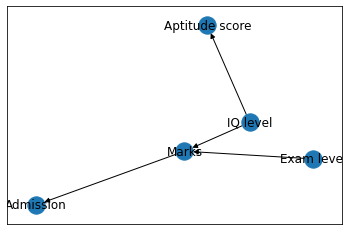


P[a=1,m=1,i=1,e=1,s=1]=P(a=1|m=1).P(m=1|i=1,e=1).P(i=1).P(e=1).P(s=1|i=1)

P(a=1|m=1)= 0.1
P(m=1|i=1,e=1)= 0.2
P(i=1)= 0.2
P(e=1)= 0.3
P(s=1|i=1)= 0.6
P[a=1,m=1, i=1, e=1, s=1]= 0.00072



In [ ]:
import networkx as nx
from matplotlib import pyplot as plt
#tables
e=(0.7,0.3)
iq=(0.8,0.2)
marks=[(0.6,0.4),(0.9,0.1),(0.5,0.5),(0.8,0.2)]
admission=[(0.60,0.40),(0.9,0.1)]
apti=[(0.75,0.25),(0.4,0.6)]

#print tables
print("\nExam")
print("|  e0  |  e1  |")
for i in e:
  print("| ",i,end=" ")
print("|\n")
print("IQ Level")
print("|  i0  |  i1  |")
for i in iq:
  print("| ",i,end=" ")
print("|\n")
print("Marks")
print("|         |   m0  |   m1  |")
k=0
sl=["i0,e0","i0,e1","i1,e0","i1,e1"]
for i in marks:
  print("| ",sl[k]," | ",i[0]," | ",i[1]," |")
  k+=1
print("\nAdmission")
print("|      |   a0  |   a1  |")
k=0
sl=["m0","m1"]
for i in admission:
  print("| ",sl[k]," | ",i[0]," | ",i[1]," |")
  k+=1

print("\nAptitude Score")
print("|      |   s0  |   s1   |")
k=0
sl=["i0","i1"]
for i in apti:
  print("| ",sl[k]," |  {a:.2f} |  {b:.2f}  |".format(a=i[0],b=i[1]))
  k+=1

#DAG Representation
g1 = nx.DiGraph()
g1.add_edges_from([("Exam level","Marks"), ("IQ level","Marks"),("IQ level","Aptitude score"),("Marks","Admission")])
plt.tight_layout()
nx.draw_networkx(g1, arrows=True)
print()
print()
plt.show()

#answer
print("\nP[a=1,m=1,i=1,e=1,s=1]=P(a=1|m=1).P(m=1|i=1,e=1).P(i=1).P(e=1).P(s=1|i=1)")
print("\nP(a=1|m=1)=",admission[1][1])
print("P(m=1|i=1,e=1)=",marks[3][1])
print("P(i=1)=",iq[1])
print("P(e=1)=",e[1])
print("P(s=1|i=1)=",apti[1][1])
print("P[a=1,m=1, i=1, e=1, s=1]=",round(admission[1][1]*marks[3][1]*iq[1]*e[1]*apti[1][1],5))
print()

In [ ]:
import pandas as pd
import math
from collections import Counter
from pprint import pprint


def entropy(probs):
    return sum([-prob * math.log(prob, 2) for prob in probs])


def entropy_of_list(a_list):
    cnt = Counter(x for x in a_list)  # Counter calculates the propotion of class
    num_instances = len(a_list) * 1.0
    probs = [x / num_instances for x in cnt.values()]
    return entropy(probs)


def IG(df, split_attr, target):
    total_ent = entropy_of_list(df[target])

    N = df.shape[0]
    df_split = df.groupby(split_attr)
    entropy = []
    for name, group in df_split:
        temp = df.loc[df[split_attr] == name]
        probability = temp.shape[0] / N
        entropy.append(probability * entropy_of_list(temp[target]))
    return total_ent - sum(entropy)


def id3(df, target, attr_list, def_class=None):
    cnt = Counter(x for x in df[target])
    if len(cnt) == 1:
        return next(iter(cnt))
    if df.empty or len(attr_list) == 0:
        return def_class
    else:
        def_class = max(cnt.keys())
        gainz = [IG(df, attr, target) for attr in attr_list]
        max_IG = gainz.index(max(gainz))
        # print(gainz)
        best_attribute = attr_list[max_IG]
        # print(best_attribute)
        tree = {best_attribute: {}}
        remaining_attributes = [i for i in attr_list if i != best_attribute]
        for attr_val, df_subset in df.groupby(best_attribute):
            subtree = id3(df_subset, target, remaining_attributes, def_class)
            tree[best_attribute][attr_val] = subtree
        return tree


data = {
    "Deadline": [
        "Urgent",
        "Urgent",
        "Near",
        "None",
        "None",
        "None",
        "Near",
        "Near",
        "Near",
        "Urgent",
    ],
    "Party": ["Yes", "No", "Yes", "Yes", "No", "Yes", "No", "No", "Yes", "No"],
    "Lazy": ["Yes", "Yes", "Yes", "No", "Yes", "No", "No", "Yes", "Yes", "No"],
    "Activity": [
        "Party",
        "Study",
        "Party",
        "Party",
        "Pub",
        "Party",
        "Study",
        "TV",
        "Party",
        "Study",
    ],
}

df = pd.DataFrame(data)
print(df)
attribute_names = list(df.columns)

print("\nList of Attributes:", attribute_names)

attribute_names.remove("Activity")  # Remove the class attribute

# print("\nPredicting Attributes:", attribute_names)

tree = id3(df, "Activity", attribute_names)
print("\nThe Resultant Decision Tree is :\n")
pprint(tree)


  Deadline Party Lazy Activity
0   Urgent   Yes  Yes    Party
1   Urgent    No  Yes    Study
2     Near   Yes  Yes    Party
3     None   Yes   No    Party
4     None    No  Yes      Pub
5     None   Yes   No    Party
6     Near    No   No    Study
7     Near    No  Yes       TV
8     Near   Yes  Yes    Party
9   Urgent    No   No    Study

List of Attributes: ['Deadline', 'Party', 'Lazy', 'Activity']

The Resultant Decision Tree is :

{'Party': {'No': {'Deadline': {'Near': {'Lazy': {'No': 'Study', 'Yes': 'TV'}},
                               'None': 'Pub',
                               'Urgent': 'Study'}},
           'Yes': 'Party'}}


In [ ]:
import pandas as pd
import numpy as np
import math
from collections import Counter
from pprint import pprint

def entropy(probs):
    return sum([-prob * math.log(prob, 2) for prob in probs])

def entropy_of_list(a_list):
    cnt = Counter(x for x in a_list)  # Counter calculates the propotion of class
    num_instances = len(a_list) * 1.0
    probs = [x / num_instances for x in cnt.values()]
    return entropy(probs)

def IG(df, split_attribute, target):
    tot_entropy = entropy_of_list(df[target])

    N = df.shape[0]
    df_split = df.groupby(split_attribute)
    entropy = []
    for name, group in df_split:
        temp = df.loc[df[split_attribute] == name]
        probability = temp.shape[0] / N
        entropy.append(probability * entropy_of_list(temp[target]))
    return tot_entropy - sum(entropy)


def id3(df, target, attribute_list, default_class=None):
    cnt = Counter(x for x in df[target])
    if len(cnt) == 1:
        return next(iter(cnt))
    if df.empty or len(attribute_list) == 0:
        return default_class
    else:
        default_class = max(cnt.keys())
        gainz = [IG(df, attr, target) for attr in attribute_list]
        max_IG = gainz.index(max(gainz))
        # print(gainz)
        best_attribute = attribute_list[max_IG]
        # print(best_attribute)
        tree = {best_attribute: {}}
        remaining_attributes = [i for i in attribute_list if i != best_attribute]
        for attr_val, df_subset in df.groupby(best_attribute):
            print("\n",best_attribute,":",attr_val,"\n",df_subset,"\n")
            subtree = id3(df_subset, target, remaining_attributes, default_class)
            tree[best_attribute][attr_val] = subtree
        return tree


data = {
    "Deadline": [
        "Urgent",
        "Urgent",
        "Near",
        "None",
        "None",
        "None",
        "Near",
        "Near",
        "Near",
        "Urgent",
    ],
    "Party": ["Yes", "No", "Yes", "Yes", "No", "Yes", "No", "No", "Yes", "No"],
    "Lazy": ["Yes", "Yes", "Yes", "No", "Yes", "No", "No", "Yes", "Yes", "No"],
    "Activity": [
        "Party",
        "Study",
        "Party",
        "Party",
        "Pub",
        "Party",
        "Study",
        "TV",
        "Party",
        "Study",
    ],
}

df = pd.DataFrame(data)

attribute_names = list(df.columns)
print("List of Attributes:", attribute_names)
attribute_names.remove("Activity")  # Remove the class attribute
print("Predicting Attributes:", attribute_names)


tree = id3(df, "Activity", attribute_names)
print("The Resultant Decision Tree is :\n")
pprint(tree)


attribute = next(iter(tree))
print("Best Attribute in the first level: ", attribute)
print("Keys on the first level: ", tree[attribute].keys())



List of Attributes: ['Deadline', 'Party', 'Lazy', 'Activity']
Predicting Attributes: ['Deadline', 'Party', 'Lazy']

 Party : No 
   Deadline Party Lazy Activity
1   Urgent    No  Yes    Study
4     None    No  Yes      Pub
6     Near    No   No    Study
7     Near    No  Yes       TV
9   Urgent    No   No    Study 


 Deadline : Near 
   Deadline Party Lazy Activity
6     Near    No   No    Study
7     Near    No  Yes       TV 


 Lazy : No 
   Deadline Party Lazy Activity
6     Near    No   No    Study 


 Lazy : Yes 
   Deadline Party Lazy Activity
7     Near    No  Yes       TV 


 Deadline : None 
   Deadline Party Lazy Activity
4     None    No  Yes      Pub 


 Deadline : Urgent 
   Deadline Party Lazy Activity
1   Urgent    No  Yes    Study
9   Urgent    No   No    Study 


 Party : Yes 
   Deadline Party Lazy Activity
0   Urgent   Yes  Yes    Party
2     Near   Yes  Yes    Party
3     None   Yes   No    Party
5     None   Yes   No    Party
8     Near   Yes  Yes    Party 

The R

In [5]:
from pprint import pprint

reward = [
    [-5, 0, 0, 0, 0],
    [0, -5, 0, 0, 0],
    [0, 0, -5, 0, 0],
    [0, 0, 0, -5, 0],
    [0, 0, 0, 0, -5],
]

valid = [
    [0, 0, 1, 1, 0],
    [0, 0, 0, 0, 0],
    [0, 1, 0, 0, 1],
    [0, 1, 1, 0, 0],
    [0, 1, 0, 0, 0],
]
pl = {0: "Canteen", 1: "CSE", 2: "ECE", 3: "Admin", 4: "Auditorium"}

def find_reward(node, l, vst):
    for x in range(5):
        if valid[node][x] > 0:
            if reward[node][x] < pow(5, l):
                reward[node][x] = max(reward[node][x], pow(5, l))
                vst1 = vst + [x]
                find_reward(x, l + 1, vst1)


def find_path(node, vst):
    if node == 1:
        print("Visited:",vst)
        reward_val = 0
        t = 1
        for (x, y) in vst:
            reward_val += y * t
            t *= 0.2
        print("Reward Value:",round(reward_val),"\n")
        return

    for x in range(5):
        if reward[node][x] > 0:
            vst1 = vst + [(x, reward[node][x])]
            find_path(x, vst1)


find_reward(0, 1, [0])
print("Initial Reward Matrix:")
pprint(reward)
print()

find_path(0, [(0, 0)])


Initial Reward Matrix:
[[-5, 0, 5, 5, 0],
 [0, -5, 0, 0, 0],
 [0, 125, -5, 0, 125],
 [0, 25, 25, -5, 0],
 [0, 625, 0, 0, -5]]

Visited: [(0, 0), (2, 5), (1, 125)]
Reward Value: 6 

Visited: [(0, 0), (2, 5), (4, 125), (1, 625)]
Reward Value: 11 

Visited: [(0, 0), (3, 5), (1, 25)]
Reward Value: 2 

Visited: [(0, 0), (3, 5), (2, 25), (1, 125)]
Reward Value: 3 

Visited: [(0, 0), (3, 5), (2, 25), (4, 125), (1, 625)]
Reward Value: 4 

